## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [ ]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

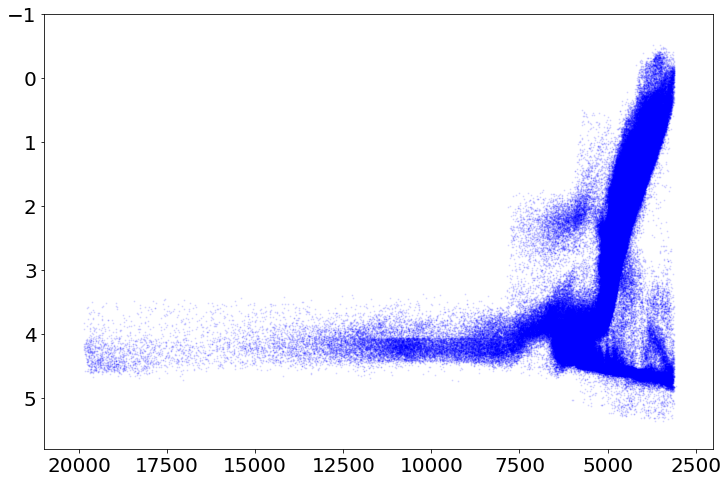

In [4]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [19]:
# write you fitting code and plot the results here

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (np.isfinite(star['FE_H']) & np.isfinite(star['NI_FE'])) &\
     (star['GLAT'] > 60)
     
cut1 = np.where(ct1)[0]

slope1, intercept1 = mcFit2(linear, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1],
                          star['NI_FE_ERR'][cut1], p0=[1,1])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')

polyA,polyB,polyC,polyD = mcFit4(poly3, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1],
                          star['NI_FE_ERR'][cut1], p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

sigA,sigB,sigC,sigD = mcFit4(sigmoid, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1],
                          star['NI_FE_ERR'][cut1], p0=[0,20,1,0])
print(f'SIGMOID: {sigA:.3f}, {sigB:.3f},{sigC:.3f},{sigD:.3f}')

LINEAR: 0.030, 0.019
POLY3: -0.042, -0.084, 0.006, 0.021
SIGMOID: 0.109, 21.606,0.041,0.006


In [23]:
print(max(star['FE_H'][cut1]))
print(min(star['FE_H'][cut1]))
print(max(star['NI_FE'][cut1]))
print(min(star['NI_FE'][cut1]))
print(len(star['NI_FE'][cut1]))

0.76844
-2.4623
2.0796576
-1.4308125
59845


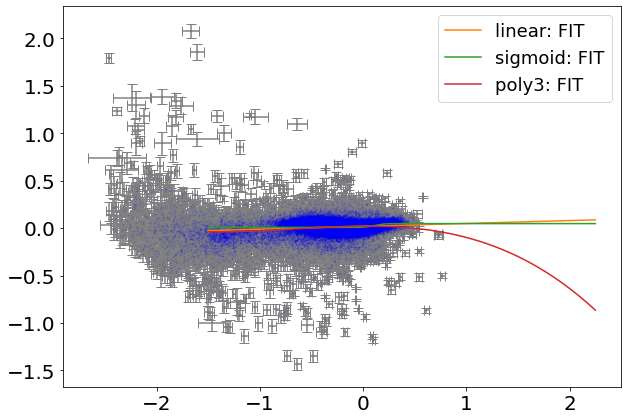

In [25]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['FE_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['FE_H'][cut1]),star['NI_FE'][cut1], xerr=(star['FE_H_ERR'][cut1]),
             yerr=(star['NI_FE_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(-1.5,2.25,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')
#sigmoid fit
ax1.plot(x_plot,sigmoid(x_plot, sigA, sigB, sigC, sigD), label='sigmoid: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

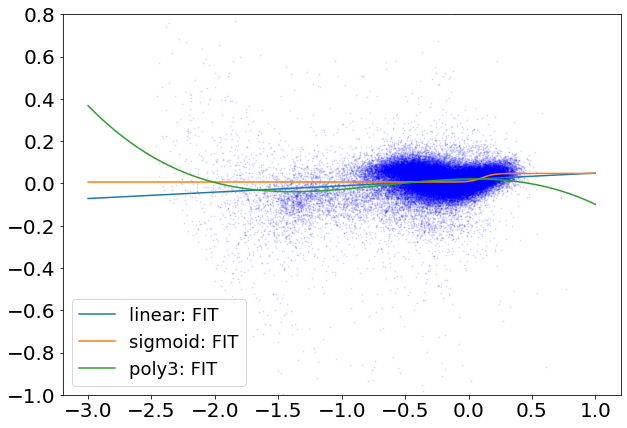

In [20]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['FE_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['FE_H'][cut1]),star['NI_FE'][cut1], xerr=(star['FE_H_ERR'][cut1]),
#             yerr=(star['NI_FE_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(-3,1,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')
#sigmoid fit
ax1.plot(x_plot,sigmoid(x_plot, sigA, sigB, sigC, sigD), label='sigmoid: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
ax1.set_ylim(-1,.8)

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [17]:
# write you fitting code and plot the results here

ct2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (np.isfinite(star['TEFF']) & np.isfinite(star['J']) & np.isfinite(star['K']) &
      np.isfinite(star['TEFF_ERR']) & np.isfinite(star['J_ERR']) & np.isfinite(star['K_ERR'])) &\
     (star['GLAT'] < -10)
     
cut2 = np.where(ct2)[0]

starjk = (star['J'][cut2]-star['K'][cut2])
starjkerr = np.sqrt(star['J_ERR'][cut2]**2 + star['K_ERR'][cut2]**2)

slope2, intercept2 = mcFit2(linear, star['TEFF'][cut2]/1000, starjk, star['TEFF_ERR'][cut2]/1000,
                          starjkerr, p0=[1,1])
print(f'LINEAR: {slope2:.3f}, {intercept2:.3f}')

logA,logB,logC,logD = mcFit4(logfit, star['TEFF'][cut2]/1000, starjk, star['TEFF_ERR'][cut2]/1000,
                          starjkerr, p0=[-1,.2,-.2,1])
print(f'LOG: {logA:.3f}, {logB:.3f}, {logC:.3f}, {logD:.3f}')

poly2A,poly2B,poly2C = mcFit3(poly2, star['TEFF'][cut2]/1000, starjk, star['TEFF_ERR'][cut2]/1000,
                          starjkerr, p0=[1,1,1])
print(f'POLY2: {poly2A:.3f}, {poly2B:.3f},{poly2C:.3f}')

LINEAR: -0.194, 1.634


<ipython-input-1-c3d1bc9ae6c9>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


LOG: -0.981, 0.244, -0.330, 0.764
POLY2: 0.023, -0.524,2.665


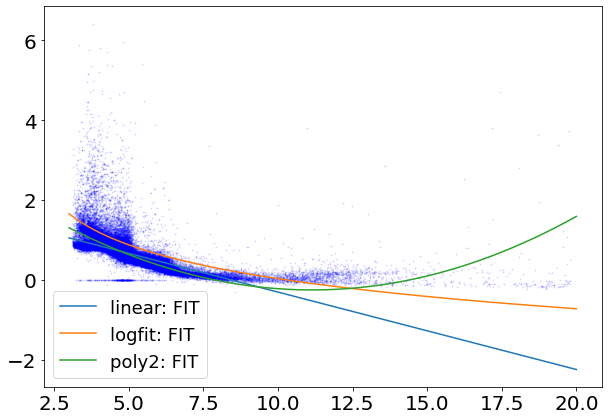

In [18]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut2]/1000,starjk,s=1,c='b',alpha=0.1)
#ax1.errorbar((star['FE_H'][cut1]),star['NI_FE'][cut1], xerr=(star['FE_H_ERR'][cut1]),
#             yerr=(star['NI_FE_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)
    
x_plot = np.linspace(3,20,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope2, intercept2), label='linear: FIT')
#log fit
ax1.plot(x_plot,logfit(x_plot, logA, logB, logC, logD), label='logfit: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly2A, poly2B, poly2C), label='poly2: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

As a side note I ended up dividing TEFF and TEFF_ERR by 1000 so that the fits showed up on the data better. \
For this plot it's between the logfit and the 2nd order polynomial fit. The polynomial fits better for the main bulk of the data and the logfit does the main bulk ok and and represents the tail of the data a little better. If made to choose one I would say the polynomial fit is the better fit. Some outliers that it might be beneficial to take out would be the small group at 0 below the main body of points. These stars seem to have had the same value for both their J band magnitude and their K band magnitude. 

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [51]:
# write you fitting code and plot the results here
ct3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (np.isfinite(star['GLON']) & np.isfinite(star['VHELIO_AVG']) &
     np.isfinite(star['VERR'])) &\
     (star['GLAT'] < 10) & (star['GLAT'] > -10)
     
cut3 = np.where(ct3)[0]

slope3, intercept3 = mcFit2(linear, star['GLON'][cut3], star['VHELIO_AVG'][cut3],.1,
                          star['VERR'][cut3], p0=[1,1])
print(f'LINEAR: {slope3:.3f}, {intercept3:.3f}')

polyA1,polyB1,polyC1,polyD1 = mcFit4(poly3, star['GLON'][cut3], star['VHELIO_AVG'][cut3],.1 ,
                          star['VERR'][cut3], p0=[1,1,1,1])
print(f'POLY3: {polyA1:.3f}, {polyB1:.3f}, {polyC1:.3f}, {polyD1:.3f}')

cosA,cosB,cosC,cosD = mcFit4(cosfit, star['GLON'][cut3], star['VHELIO_AVG'][cut3], .1,
                          star['VERR'][cut3], p0=[1,2,1,1])
print(f'COSINE: {cosA:.3f}, {cosB:.3f},{cosC:.3f},{cosD:.3f}')

LINEAR: 0.030, 0.019
POLY3: -0.000, 0.014, -1.781, 27.970
COSINE: 3.603, 2.004,2.646,-4.168


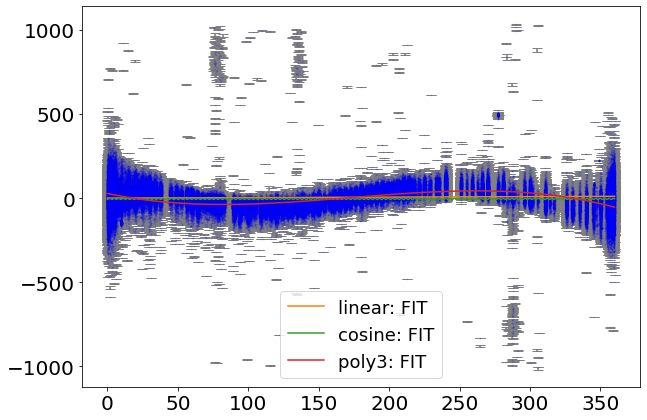

In [53]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GLON'][cut3],star['VHELIO_AVG'][cut3],s=1,c='b',alpha=0.1)
ax1.errorbar((star['GLON'][cut3]),star['VHELIO_AVG'][cut3],
             yerr=(star['VERR'][cut3]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(0,360,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope3, intercept3), label='linear: FIT')
#sigmoid fit
ax1.plot(x_plot,cosfit(x_plot, cosA, cosB, cosC, cosD), label='cosine: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA1, polyB1, polyC1, polyD1), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

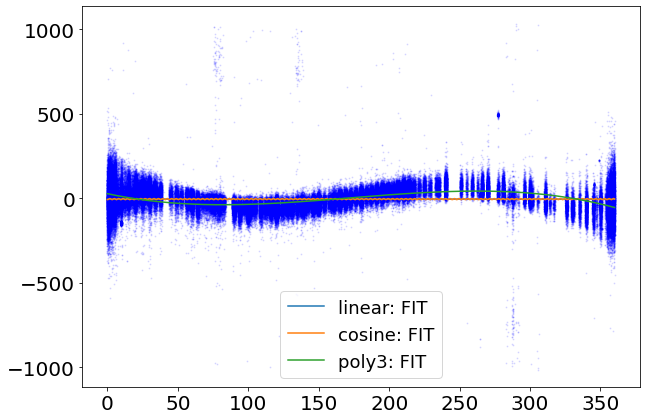

In [56]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GLON'][cut3],star['VHELIO_AVG'][cut3],s=1,c='b',alpha=0.1)

x_plot = np.linspace(0,360,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope3, intercept3), label='linear: FIT')
#sigmoid fit
ax1.plot(x_plot,cosfit(x_plot, cosA, cosB, cosC, cosD), label='cosine: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA1, polyB1, polyC1, polyD1), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

#do something about outliers with residuals

The 3rd order polynomial seems to fit this dataset the best. The linear trend ignores the curves of the plot and the cosine fit ends up have curves that are so tight that it ends up looking like a straight line. The 3rd order polynomial follows the gentle curve that can be seen in the plot. There does seem to be a small outlier population at longitude of about 275 and average VHelio of 500. It is way less stars than the main body of stars so it is unlikely excluding it in the fit will change things significantly. 

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [7]:
# write you fitting code and plot the results here
ct4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (np.isfinite(star['NVISTIS']) & np.isfinite(star['VSCATTER']) & np.isfinite(star['VERR'])) &\
     (star['NVISTIS'] >= 1)
     
cut4 = np.where(ct4)[0]

#slope4, intercept4 = mcFit2(linear, star['NVISTIS'][cut4], star['VSCATTER'][cut4], .1,
#                          star['VERR'][cut4], p0=[1,1])
print(f'LINEAR: {slope4:.3f}, {intercept4:.3f}')

#polyA2,polyB2,polyC2,polyD2 = mcFit4(poly3, star['NVISTIS'][cut4], star['VSCATTER'][cut4], .1,
#                          star['VERR'][cut4], p0=[1,1,1,1])
print(f'POLY3: {polyA2:.3f}, {polyB2:.3f}, {polyC2:.3f}, {polyD2:.3f}')

expA,expB,expC,expD = mcFit4(exponential, star['NVISTIS'][cut4], star['VSCATTER'][cut4], .1,
                          star['VERR'][cut4], p0=[1,-5,0,.3])
print(f'EXPONENTIAL: {expA:.3f}, {expB:.3f},{expC:.3f},{expD:.3f}')

LINEAR: 0.107, 0.454
POLY3: 0.000, -0.019, 0.380, -0.108


<ipython-input-2-c3d1bc9ae6c9>:20: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x + c) + d
<ipython-input-2-c3d1bc9ae6c9>:20: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(b*x + c) + d


EXPONENTIAL: 4984.930, -490.871,-4607.049,0.847


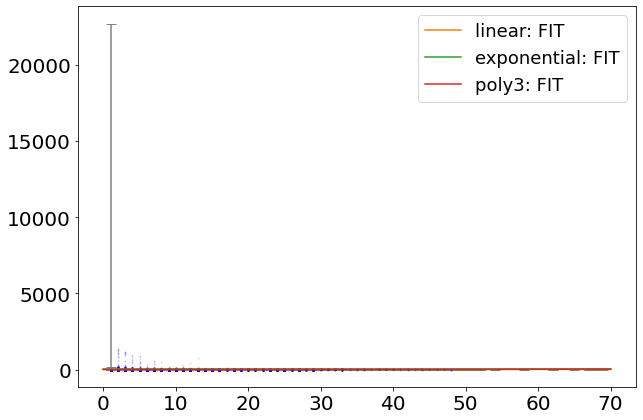

In [10]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['NVISTIS'][cut4],star['VSCATTER'][cut4],s=1,c='b',alpha=0.1)
ax1.errorbar((star['NVISTIS'][cut4]),star['VERR'][cut4],
             yerr=(star['VERR'][cut4]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(0,70,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope4, intercept4), label='linear: FIT')
#sigmoid fit
ax1.plot(x_plot,exponential(x_plot, expA, expB, expC, expD), label='exponential: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA2, polyB2, polyC2, polyD2), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
#ax1.set_ylim(-100,5000)
plt.show()

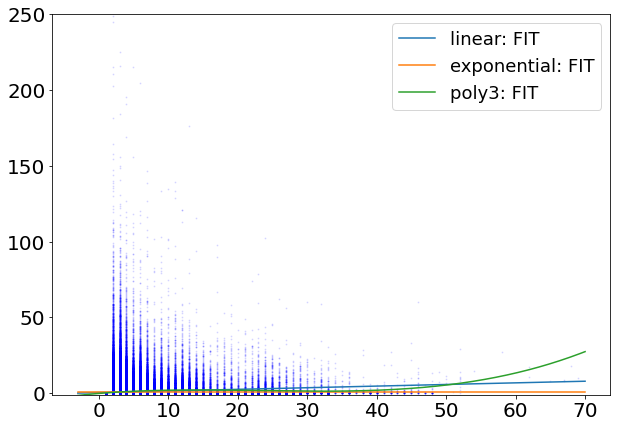

In [9]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['NVISTIS'][cut4],star['VSCATTER'][cut4],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['NVISTIS'][cut4]),star['VERR'][cut4],
#             yerr=(star['VERR'][cut4]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(-3,70,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope4, intercept4), label='linear: FIT')
#sigmoid fit
ax1.plot(x_plot,exponential(x_plot, expA, expB, expC, expD), label='exponential: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA2, polyB2, polyC2, polyD2), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
ax1.set_ylim(-1,250)
plt.show()

All of these fits are pretty bad. Judging from the shape of the data the exponential fit should be the best but curvefit doesn't seem to want to give a reasonable shape to the exponential function for whatever reason. You can't see it in this graph but it's an extremely sharp curve with the bottom way off in the negative x values. So we are left with essentially a flat line in the range where our data lies. The 3rd order polynomial and the linear fit don't do any better representing this data. 

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [18]:
# write your fitting code and plot the results here
ct5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (np.isfinite(star['RA']) & np.isfinite(star['GAIA_PMRA']) & np.isfinite(star['GAIA_PMRA_ERROR']))
     
cut5 = np.where(ct5)[0]

slope5, intercept5 = mcFit2(linear, star['RA'][cut5], star['GAIA_PMRA'][cut5],
                          y_err=star['GAIA_PMRA_ERROR'][cut5], p0=[1,1])
print(f'LINEAR: {slope5:.3f}, {intercept5:.3f}')

polyA3,polyB3,polyC3,polyD3 = mcFit4(poly3, star['RA'][cut5], star['GAIA_PMRA'][cut5],
                          y_err=star['GAIA_PMRA_ERROR'][cut5], p0=[1,1,1,1])
print(f'POLY3: {polyA3:.3f}, {polyB3:.3f}, {polyC3:.3f}, {polyD3:.3f}')

poly2A1,poly2B1,poly2C1 = mcFit3(poly2, star['RA'][cut5], star['GAIA_PMRA'][cut5],
                          y_err=star['GAIA_PMRA_ERROR'][cut5], p0=[1,1,1])
print(f'POLY2: {poly2A1:.3f}, {poly2B1:.3f},{poly2C1:.3f}')

LINEAR: -0.019, 0.602
POLY3: 0.000, -0.000, -0.169, 13.114
POLY2: 0.001, -0.275,16.746


In [22]:
len(star['RA'][cut5])

682016

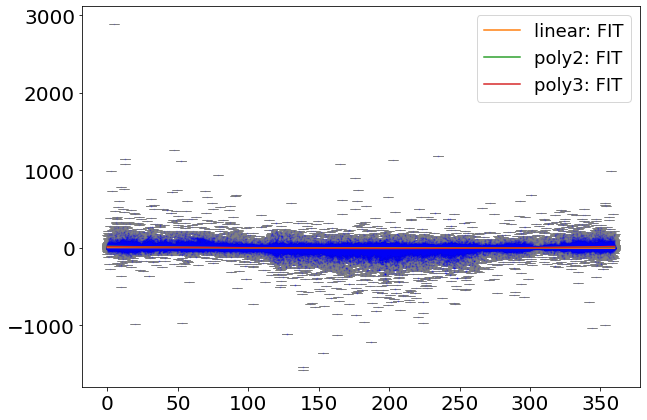

In [19]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['RA'][cut5],star['GAIA_PMRA'][cut5],s=1,c='b',alpha=0.1)
ax1.errorbar((star['RA'][cut5]),star['GAIA_PMRA'][cut5],
             yerr=(star['GAIA_PMRA_ERROR'][cut5]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(0,360,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope5, intercept5), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly2A1, poly2B1, poly2C1), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA3, polyB3, polyC3, polyD3), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
#ax1.set_ylim(-100,250)
plt.show()

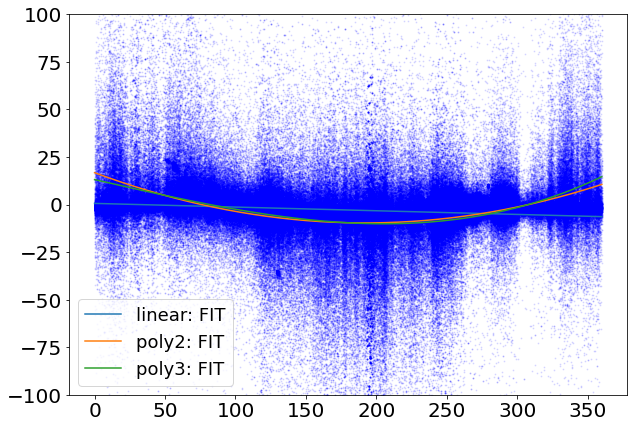

In [20]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

ax1.scatter(star['RA'][cut5],star['GAIA_PMRA'][cut5],s=1,c='b',alpha=0.1)

x_plot = np.linspace(0,360,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope5, intercept5), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly2A1, poly2B1, poly2C1), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA3, polyB3, polyC3, polyD3), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
ax1.set_ylim(-100,100)
plt.show()

The 2nd and 3rd order polynomial fits look basically the same, due to the coefficient of the $x^3$ term being essentially 0. I think they both do a good job of capturing some of the points above the main body at the ends and below the main body in the middle. However, it might be worth it so calculate the residuals for the dataset and see if any of the more extreme points can be removed as outliers.  

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [12]:
# write you fitting code and plot the results here
ct6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (np.isfinite(star['TEFF']) & np.isfinite(star['LOGG'])) &\
     (star['TEFF']<6000) & (star['LOGG']<3)
     
cut6 = np.where(ct6)[0]

slope6, intercept6 = mcFit2(linear, star['TEFF'][cut6], star['LOGG'][cut6],star['TEFF_ERR'][cut6],
                          y_err=star['LOGG_ERR'][cut6], p0=[1,1])
print(f'LINEAR: {slope6:.3f}, {intercept6:.3f}')

polyA4,polyB4,polyC4,polyD4 = mcFit4(poly3, star['TEFF'][cut6], star['LOGG'][cut6],star['TEFF_ERR'][cut6],
                          y_err=star['LOGG_ERR'][cut6], p0=[1,1,1,1])
print(f'POLY3: {polyA4:.3f}, {polyB4:.3f}, {polyC4:.3f}, {polyD4:.3f}')

poly2A2,poly2B2,poly2C2 = mcFit3(poly2, star['TEFF'][cut6], star['LOGG'][cut6],star['TEFF_ERR'][cut6],
                          y_err=star['LOGG_ERR'][cut6], p0=[1,1,1])
print(f'POLY2: {poly2A2:.3f}, {poly2B2:.3f},{poly2C2:.3f}')

LINEAR: 0.001, -4.330
POLY3: -0.000, 0.000, -0.025, 31.496
POLY2: -0.000, 0.006,-13.550


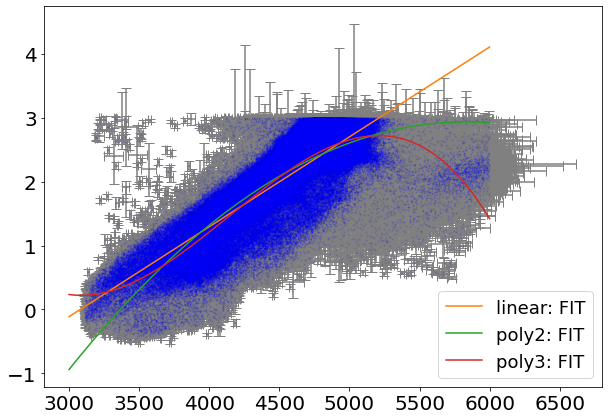

In [15]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut6],star['LOGG'][cut6],s=1,c='b',alpha=0.1)
ax1.errorbar(star['TEFF'][cut6],star['LOGG'][cut6],xerr=(star['TEFF_ERR'][cut6]),
             yerr=(star['LOGG_ERR'][cut6]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(3000,6000,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope6, intercept6), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly2A2, poly2B2, poly2C2), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA4, polyB4, polyC4, polyD4), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

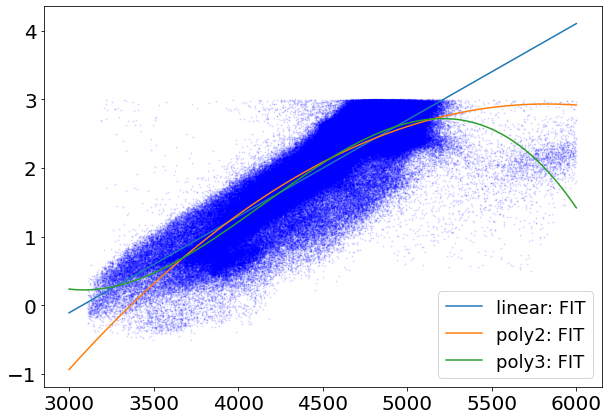

In [16]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut6],star['LOGG'][cut6],s=1,c='b',alpha=0.1)

x_plot = np.linspace(3000,6000,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope6, intercept6), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly2A2, poly2B2, poly2C2), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA4, polyB4, polyC4, polyD4), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

I think overall the linear trend is probably the best fit. The 2nd order polynomial does pretty well but turns off the main body a little early due to the cut in LOG G that was made. There does seem to be a bit of an outlier population in a clump around 5700 TEFF and 2 LOG G. However, it is a relatively small population of stars and might be apart of a larger grouping above 6000 TEFF. It might be more beneficial to lower the upper bound in TEFF you get rid of that population instead of fitting it separately. 

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [24]:
ct7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (np.isfinite(star['GAIA_PARALLAX']) & np.isfinite(star['GAIA_PMRA']))
     
cut7 = np.where(ct7)[0]

slope7, intercept7 = mcFit2(linear, star['GAIA_PARALLAX_ERROR'][cut7], star['GAIA_PMRA'][cut7],
                            star['GAIA_PARALLAX_ERROR'][cut7],['GAIA_PMRA_ERROR'][cut7], p0=[1,1])
print(f'LINEAR: {slope6:.3f}, {intercept6:.3f}')

polyA5,polyB5,polyC5,polyD5 = mcFit4(poly3, star['GAIA_PARALLAX_ERROR'][cut7], star['GAIA_PMRA'][cut7],
                            star['GAIA_PARALLAX_ERROR'][cut7],['GAIA_PMRA_ERROR'][cut7], p0=[1,1,1,1])
print(f'POLY3: {polyA5:.3f}, {polyB5:.3f}, {polyC5:.3f}, {polyD5:.3f}')

poly2A3,poly2B3,poly2C3 = mcFit3(poly2, star['GAIA_PARALLAX_ERROR'][cut7], star['GAIA_PMRA'][cut7],
                            star['GAIA_PARALLAX_ERROR'][cut7],star['GAIA_PMRA_ERROR'][cut7], p0=[1,1,1])
print(f'POLY2: {poly2A3:.3f}, {poly2B3:.3f},{poly2C3:.3f}')

LINEAR: 0.001, -4.330
POLY3: -0.037, 0.468, -1.115, -2.834
POLY2: 0.253, -0.952,-2.837


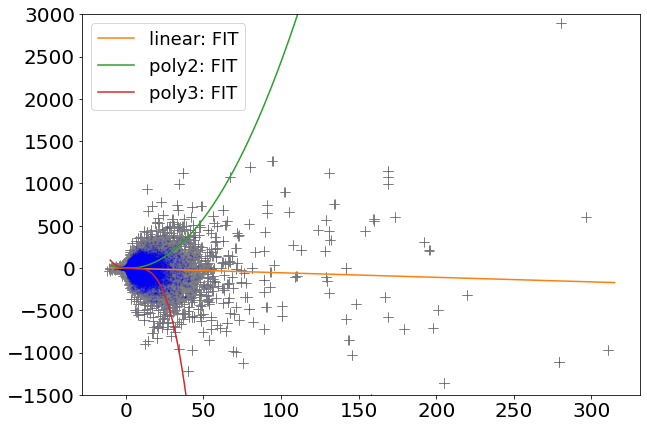

In [31]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GAIA_PARALLAX'][cut7],star['GAIA_PMRA'][cut7],s=1,c='b',alpha=0.1)
ax1.errorbar(star['GAIA_PARALLAX'][cut7],star['GAIA_PMRA'][cut7],xerr=(star['GAIA_PARALLAX_ERROR'][cut7]),
             yerr=(star['GAIA_PMRA_ERROR'][cut7]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(-10,315,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope7, intercept7), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly2A3, poly2B3, poly2C3), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA5, polyB5, polyC5, polyD5), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
#ax1.set_ylim(-1500,3000)
plt.show()

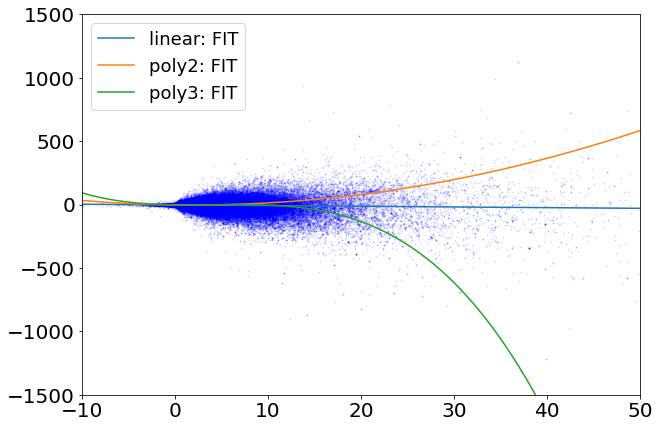

In [33]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GAIA_PARALLAX'][cut7],star['GAIA_PMRA'][cut7],s=1,c='b',alpha=0.1)

x_plot = np.linspace(-10,315,500) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope7, intercept7), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly2A3, poly2B3, poly2C3), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA5, polyB5, polyC5, polyD5), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
ax1.set_ylim(-1500,1500)
ax1.set_xlim(-10,50)
plt.show()

I think the linear fit works best for this plot. The 2nd order and 3rd order polynomial fits go off to positive and negative infinity a little bit too early. However, all three desribe the main bulk of the stars, at 0 GAIA_PMRA between about a Gaia parallax of 0 and 15. From only a simple visual inspection there don't appear to be any significant outlier populations. 